### MACHINE HACK CHALLENGE


Buyers spend a significant amount of time surfing an e-commerce store, since the pandemic the e-commerce has seen a boom in the number of users across the domains. In the meantime, the store owners are also planning to attract customers using various algorithms to leverage customer behavior patterns

Tracking customer activity is also a great way of understanding customer behavior and figuring out what can actually be done to serve them better. Machine learning and AI has already played a significant role in designing various recommendation engines to lure customers by predicting their buying patterns

In this competition provided the visitor's session data, we are challenging the Machinehack community to come up with a regression algorithm to predict the time a buyer will spend on the platform.

Dataset Description:

Train.json - 5429 rows x 9 columns (Includes time_spent Column as Target variable)
Test.json - 2327 rows x 8 columns
Sample Submission.csv - Please check the Evaluation section for more details on how to generate a valid submission
 
Attribute Description:

session_id - Unique identifier for every row
session_number - Session type identifier
client_agent - Client-side software details
device_details -  Client-side device details
date - Datestamp of the session
purchased - Binary value for any purchase done
added_in_cart - Binary value for cart activity
checked_out -  Binary value for checking out successfully
time_spent - Total time spent in seconds (Target Column)
 

Problem Statement:

The competition focused on developing a machine learning model to buyers’ time spent on an eCommerce platform.

Evaluation metric: Root mean squared logarithmic error

Target variable: “time_spent”

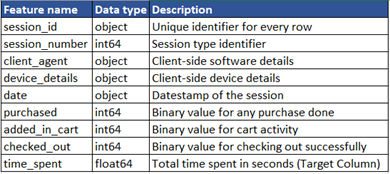

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('Train.csv') #read train data
train.head(3)

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704


In [4]:
test = pd.read_csv('Test.csv')
test.head(2)

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,2020-01-07,1,0,0
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,2020-02-13,0,0,0


In [5]:
train.shape,test.shape #size of train and test data

((5429, 9), (2327, 8))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_id      5429 non-null   object 
 1   session_number  5429 non-null   int64  
 2   client_agent    5269 non-null   object 
 3   device_details  5429 non-null   object 
 4   date            5429 non-null   object 
 5   purchased       5429 non-null   int64  
 6   added_in_cart   5429 non-null   int64  
 7   checked_out     5429 non-null   int64  
 8   time_spent      5429 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 381.9+ KB


In [7]:
train.isnull().sum()

session_id          0
session_number      0
client_agent      160
device_details      0
date                0
purchased           0
added_in_cart       0
checked_out         0
time_spent          0
dtype: int64

- client agent has 160 null values in train data

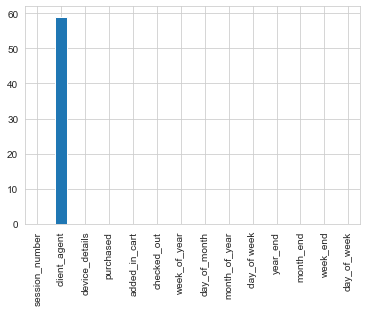

In [62]:
test.isnull().sum().plot.bar() #missing values

- client agent has 59 mising values in client data

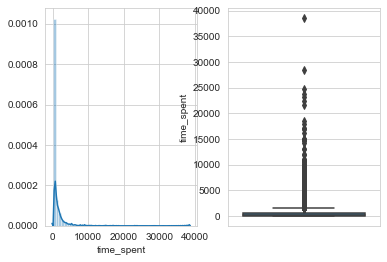

In [13]:
# examining the target column 'time_spent'
f = plt.figure()
f.add_subplot(1,2,1)
sns.distplot(train.time_spent)
f.add_subplot(1,2,2)
sns.boxplot(y=train.time_spent)
plt.show()

#### Outlier removal

 removing those 55 entries where time_spent is greater than 99 percentile

In [14]:
print('train shape before',train.shape)
percentile_99 = np.percentile(train.time_spent,99)
train = train[train.time_spent<percentile_99]
print('train shape after',train.shape)

train shape before (5429, 9)
train shape after (5374, 9)


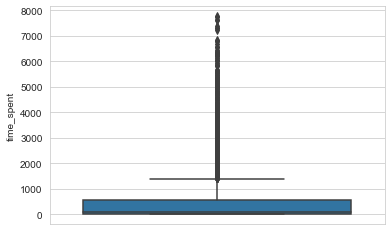

In [16]:
sns.boxplot(y=train.time_spent) #post outlier removal
plt.show()

In [15]:
## Taking Log transformation of time_spent
train['log_time_spent'] = np.log(train.time_spent)

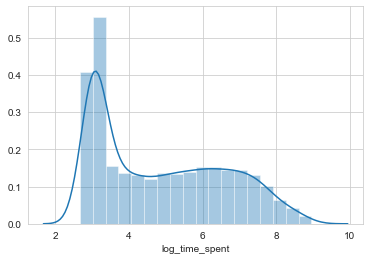

In [17]:
sns.distplot(train.log_time_spent) #post log transformation
plt.show()

In [19]:
train.drop('session_id',axis=1,inplace=True) #drop session id
test.drop('session_id',axis=1,inplace=True)

### WORKING ON DATA ATTRIBUTE

In [20]:
train['date'] = pd.to_datetime(train.date)
test['date'] = pd.to_datetime(test.date)

In [22]:
train['week_of_year'] = train['date'].dt.week
test['week_of_year'] = test['date'].dt.week

In [25]:
train['day_of_month'] = train['date'].apply(lambda x:str(x).split('-')[-1].split(' ')[0])
train['day_of_month'] = train['day_of_month'].astype(int)

In [26]:
test['day_of_month'] = test['date'].apply(lambda x:str(x).split('-')[-1].split(' ')[0])
test['day_of_month'] = test['day_of_month'].astype(int)

In [28]:
train['month_of_year'] = train['date'].dt.month
test['month_of_year'] = test['date'].dt.month

In [36]:
train['day_of week'] = train['date'].dt.dayofweek
test['day_of_week'] = test['date'].dt.dayofweek

In [33]:
# create three features year_end, month_end and week_end
train['year_end']=0
test['year_end']=0
train.loc[train['week_of_year'].isin([51,52,1,2]),'year_end'] =1
test.loc[test['week_of_year'].isin([51,52,1,2]),'year_end'] =1

In [34]:
train['month_end']=0
test['month_end']=0
train.loc[train['day_of_month'].isin([28,29,30,31,1,2]),'month_end'] =1
test.loc[test['day_of_month'].isin([28,29,30,31,1,2]),'month_end'] =1

In [39]:
test.head(2)

,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,week_of_year,day_of_month,month_of_year,day_of week,year_end,month_end,week_end,day_of_week
0,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,2020-01-07,1,0,0,2,7,1,1,1,0,0,1
1,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,2020-02-13,0,0,0,7,13,2,3,0,0,0,3


In [40]:
train['week_end']=0
test['week_end']=0
train.loc[train['day_of week'].isin([0,6]),'week_end'] =1
test.loc[test['day_of week'].isin([0,6]),'week_end'] =1

In [41]:
#drop date
train.drop('date',axis=1,inplace=True)
test.drop('date',axis=1,inplace=True)

### MODEL BUILDING WITH PYCARET

In [42]:
from pycaret.regression import *

In [43]:
train.drop('log_time_spent',axis=1,inplace=True)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5374 entries, 0 to 5428
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_number  5374 non-null   int64  
 1   client_agent    5215 non-null   object 
 2   device_details  5374 non-null   object 
 3   purchased       5374 non-null   int64  
 4   added_in_cart   5374 non-null   int64  
 5   checked_out     5374 non-null   int64  
 6   time_spent      5374 non-null   float64
 7   week_of_year    5374 non-null   int64  
 8   day_of_month    5374 non-null   int32  
 9   month_of_year   5374 non-null   int64  
 10  day_of week     5374 non-null   int64  
 11  year_end        5374 non-null   int64  
 12  month_end       5374 non-null   int64  
 13  week_end        5374 non-null   int64  
dtypes: float64(1), int32(1), int64(10), object(2)
memory usage: 768.8+ KB


In [47]:
reg = setup(data = train, 
             target = 'time_spent',
             categorical_features = ['client_agent','device_details']  , 
             ignore_features = ['session_number'],
             normalize = True,transform_target=True,transform_target_method='box-cox',
             silent = True)

,Description,Value
0,session_id,7682
1,Target,time_spent
2,Original Data,"(5374, 14)"
3,Missing Values,True
4,Numeric Features,2
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3761, 649)"


In [48]:
compare_models()[:5]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,450.7121,943962.2913,967.1256,0.0870,1.4576,1.6418,4.6590
gbr,Gradient Boosting Regressor,439.6742,989904.9374,990.4510,0.0428,1.3703,1.1795,1.3870
catboost,CatBoost Regressor,446.7262,990973.3828,990.2065,0.0399,1.3729,1.2646,5.8490
ada,AdaBoost Regressor,447.7618,993836.5625,992.3502,0.0393,1.4280,1.6168,1.0830
lightgbm,Light Gradient Boosting Machine,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0730
xgboost,Extreme Gradient Boosting,455.6416,1131506.6125,1049.7567,-0.0924,1.3714,1.3186,2.9350
knn,K Neighbors Regressor,495.7492,1154779.5560,1070.1888,-0.1180,1.6927,1.7435,0.2870
et,Extra Trees Regressor,537.7621,1167611.5966,1076.9832,-0.1433,1.6487,3.0830,8.5700
lasso,Lasso Regression,513.4632,1234562.4621,1106.8802,-0.1963,1.7511,1.7857,0.6720
llar,Lasso Least Angle Regression,513.4632,1234562.4621,1106.8802,-0.1963,1.7511,1.7857,0.0630


PowerTransformedTargetRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                power...
                                regressor=RandomForestRegressor(bootstrap=True,
                                                                ccp_alpha=0.0,
                                                                criterion='mse',
                                                                max_depth=None,
                      

In [50]:
cb = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,527.0334,1382224.9558,1175.6806,-0.1508,1.4842,1.1692
1,422.5727,682396.0895,826.0727,0.1900,1.4249,1.4519
2,381.4037,731887.8355,855.5044,0.0960,1.3094,1.2584
3,463.8730,980107.3154,990.0037,0.0501,1.4074,1.2490
4,426.9555,1061681.0369,1030.3791,0.1813,1.2927,1.1349
5,433.3161,1063440.0035,1031.2323,0.0921,1.2651,1.2022
6,488.7843,1245442.1984,1115.9938,0.0482,1.3892,1.3289
7,436.5750,853750.2316,923.9861,0.0447,1.3500,1.2261
8,456.7738,1003897.6187,1001.9469,-0.0456,1.3671,1.2356
9,429.9747,904906.5430,951.2658,-0.1072,1.4393,1.3897


In [52]:
predictions = predict_model(cb, data = test)
sample = pd.DataFrame()
sample['time_spent'] = predictions['Label']
sample.to_csv('buyer_time_prediction.csv',index=False)
sample.head()

,time_spent
0,429.857065
1,73.337653
2,342.835181
3,61.868458
4,59.960150


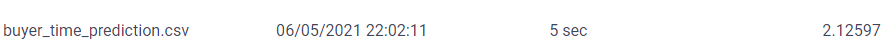

Leaderboard 209

In [54]:
tuned_cb = tune_model(cb)
predictions = predict_model(cb, data = test)
sample = pd.DataFrame()
sample['time_spent'] = predictions['Label']
sample.to_csv('buyer_time_prediction.csv',index=False)
sample.head()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,492.7059,1223805.6068,1106.2575,-0.0189,1.4708,1.0708
1,424.6135,770497.4938,877.7799,0.0854,1.4113,1.2710
2,377.7006,741352.5547,861.0183,0.0843,1.3145,1.2424
3,459.4150,983832.6131,991.8834,0.0465,1.4161,1.1995
4,426.2012,1151083.9106,1072.8858,0.1124,1.2901,1.1018
5,428.8861,1081639.4798,1040.0190,0.0765,1.2724,1.1580
6,491.4080,1265085.8783,1124.7604,0.0332,1.3806,1.1834
7,428.0056,833944.9477,913.2059,0.0668,1.3511,1.1654
8,446.8274,966677.1770,983.1974,-0.0068,1.3679,1.1300
9,402.1225,799410.8634,894.0978,0.0218,1.4234,1.2754


,time_spent
0,429.857065
1,73.337653
2,342.835181
3,61.868458
4,59.960150


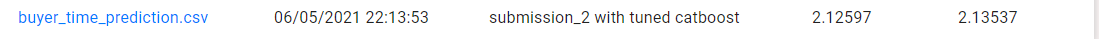

### BLEND MODELS

In [57]:
gbr = create_model('gbr')
xgb = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,571.5338,2110657.5000,1452.8102,-0.7573,1.4713,1.2238
1,441.9345,774505.3750,880.0599,0.0806,1.4155,1.4266
2,382.0280,730787.6875,854.8612,0.0973,1.3173,1.3251
3,466.9637,988460.7500,994.2136,0.0420,1.4180,1.3738
4,426.0962,1097651.1250,1047.6885,0.1536,1.3024,1.1295
5,434.7617,1085888.8750,1042.0599,0.0729,1.2665,1.1858
6,485.9920,1243554.8750,1115.1479,0.0497,1.3678,1.3828
7,424.5107,791350.0625,889.5786,0.1145,1.3385,1.2662
8,486.7065,1496721.8750,1223.4059,-0.5589,1.3779,1.4545
9,435.8888,995488.0000,997.7415,-0.2181,1.4391,1.4181


In [58]:
blender_specific = blend_models(estimator_list = [cb,xgb,gbr])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,512.6903,1254973.2976,1120.2559,-0.0449,1.4659,1.1310
1,428.2008,745880.3190,863.6436,0.1146,1.4060,1.3325
2,377.4135,729932.5843,854.3609,0.0984,1.3017,1.2440
3,461.1247,979103.0038,989.4963,0.0511,1.4075,1.2478
4,424.4217,1101744.6408,1049.6402,0.1505,1.2877,1.0979
5,424.7821,1064336.1794,1031.6667,0.0913,1.2548,1.1443
6,487.0718,1253777.2196,1119.7219,0.0419,1.3696,1.2290
7,426.6638,820267.5994,905.6863,0.0821,1.3416,1.1932
8,452.8912,985767.3192,992.8582,-0.0267,1.3594,1.1889
9,407.5026,796050.6261,892.2167,0.0260,1.4186,1.2972


In [60]:
predictions = predict_model(blender_specific, data = test)
sample = pd.DataFrame()
sample['time_spent'] = predictions['Label']
sample.to_csv('buyer_time_prediction.csv',index=False)
sample.head()

,time_spent
0,444.290217
1,75.122326
2,367.116200
3,67.870120
4,66.222496


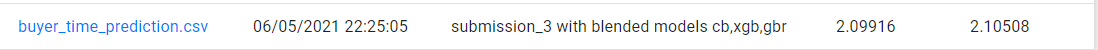

### SOME MORE FEATURE ENGINEERING

the ‘device_details’ column to make three new columns — medium_used; device_used; os_used, using feature engineering

In [89]:
train.device_details.value_counts()

iPhone - iOS                  1494
Desktop - Chrome               811
iPhone - Web                   653
Android Phone - Android        323
Desktop - Safari               312
Desktop - IE                   290
iPad - Web                     286
iPhone - MobileWeb             275
Desktop - Firefox              229
Android Tablet - Web           203
Other - Other                  184
Unknown - MobileWeb             87
Android Phone - Web             86
iPad - iOS                      76
Android Phone - MobileWeb       54
Android Tablet - Android         9
Android Tablet - MobileWeb       2
Name: device_details, dtype: int64

In [ ]:
def medium_used(col_value):
    if col_value.split('-')[1].split(' ')[1] =='':
        return 'Desktop'
    elif col_value.split('-')[0].split(' ')[0] =='iPhone':
        return 'iPhone'
    elif col_value.split('-')[0].split(' ')[0] =='iPhone':
        return 'iPhone'    
    elif col_value.split('-')[0].split(' ')[0] =='Android':
        return 'Android'
    else: return 'Others'
    
train['device_used'] = train['device_details'].apply(medium_used)

In [87]:
train.device_used.unique()

array(['Desktop', 'iPhone', 'Android', 'Others'], dtype=object)

In [88]:
test['device_used'] = test['device_details'].apply(medium_used)